In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

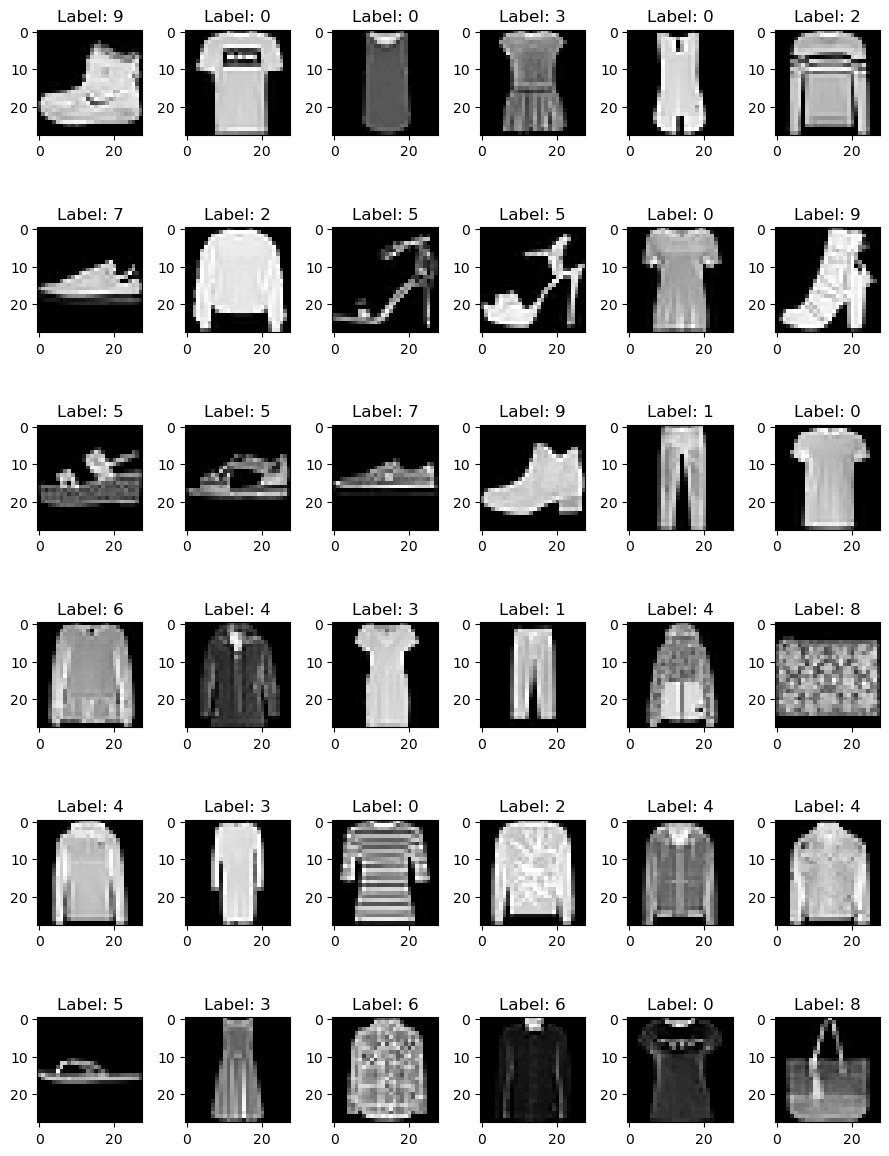

In [ ]:
# specify the number of rows and columns you want to see
num_row = 6
num_col = 6

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X = X_train.reshape(60000,784)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(4), random_state=1,max_iter = 100)

clf.fit(X, y)

c:\Users\ammar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=4, max_iter=100, random_state=1)

In [ ]:
y_pred = clf.predict(X_test.reshape(10000,784))

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [ ]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(Y_test,y_pred,labels=np.unique(Y_test))
cm

array([[803,   3,  13,  92,   5,   0,  68,   0,  16,   0],
       [  0, 929,   7,  44,   9,   0,   3,   4,   4,   0],
       [ 30,   2, 689,  14, 153,   2,  95,   0,  15,   0],
       [ 43,  13,   8, 868,  25,   0,  36,   0,   7,   0],
       [  2,   0, 116,  38, 729,   0, 104,   0,   8,   3],
       [  0,   0,   3,   0,   0, 897,   0,  53,  13,  34],
       [201,   2, 149,  70, 103,   3, 449,   0,  22,   1],
       [  0,   0,   0,   0,   0,  31,   0, 942,   0,  27],
       [ 27,   3,  10,   7,   3,   2,   8,   5, 935,   0],
       [  0,   0,   4,   0,   0,  18,   1,  55,   1, 921]], dtype=int64)

In [ ]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8162


In [ ]:
classification_report(Y_test,y_pred,labels=np.unique(Y_test),target_names=class_names)

'              precision    recall  f1-score   support\n\n T-shirt/top       0.73      0.80      0.76      1000\n     Trouser       0.98      0.93      0.95      1000\n    Pullover       0.69      0.69      0.69      1000\n       Dress       0.77      0.87      0.81      1000\n        Coat       0.71      0.73      0.72      1000\n      Sandal       0.94      0.90      0.92      1000\n       Shirt       0.59      0.45      0.51      1000\n     Sneaker       0.89      0.94      0.92      1000\n         Bag       0.92      0.94      0.93      1000\n  Ankle boot       0.93      0.92      0.93      1000\n\n    accuracy                           0.82     10000\n   macro avg       0.81      0.82      0.81     10000\nweighted avg       0.81      0.82      0.81     10000\n'

# Changed part of Excercise 2: Build a more accurate model
I will first be implementing GridSearchCV,

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()

X = X_train.reshape(60000,784)
y = Y_train

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=1)  # gridsearch is expensive, so i will be using max_iter=1 to speed up the process

parameter_space =  {'solver': ['lbfgs','sgd','adam'], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9], 'activation':['tanh','relu']}


clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=2)  # perform grid search
clf.fit(X, y)  # fit the model to the data

# the best parameters found
print('Best parameters found:')
print(clf.best_params_)
print('Best score found:', clf.best_score_)
print('Best estimator found:', clf.best_estimator_)



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best parameters found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 14, 'random_state': 5, 'solver': 'adam'}
Best score found: 0.7914333333333333
Best estimator found: MLPClassifier(alpha=0.001, hidden_layer_sizes=14, max_iter=1, random_state=5)


c:\Users\ammar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# move best params to clf
clf = MLPClassifier(**clf.best_params_)
clf.fit(X, y)

c:\Users\ammar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=14, random_state=5)

In [ ]:
y_pred = clf.predict(X_test.reshape(10000,784))

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [ ]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(Y_test,y_pred,labels=np.unique(Y_test))
cm

array([[760,   3,  24,  67,   5,   1, 131,   1,   8,   0],
       [  3, 962,   2,  28,   3,   0,   2,   0,   0,   0],
       [ 13,   3, 837,  19,  75,   0,  46,   1,   6,   0],
       [ 17,  10,  20, 903,  18,   0,  25,   0,   7,   0],
       [  0,   2, 162,  60, 718,   0,  54,   0,   4,   0],
       [  0,   0,   0,   1,   0, 943,   0,  30,   5,  21],
       [104,   3, 162,  47,  74,   0, 598,   0,  10,   2],
       [  0,   0,   0,   0,   0,  27,   0, 953,   0,  20],
       [  2,   1,  19,  13,  10,   6,  15,   6, 926,   2],
       [  3,   0,   0,   0,   0,  14,   0,  45,   0, 938]], dtype=int64)

In [ ]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8538


In [ ]:
classification_report(Y_test,y_pred,labels=np.unique(Y_test),target_names=class_names)

'              precision    recall  f1-score   support\n\n T-shirt/top       0.84      0.76      0.80      1000\n     Trouser       0.98      0.96      0.97      1000\n    Pullover       0.68      0.84      0.75      1000\n       Dress       0.79      0.90      0.84      1000\n        Coat       0.80      0.72      0.75      1000\n      Sandal       0.95      0.94      0.95      1000\n       Shirt       0.69      0.60      0.64      1000\n     Sneaker       0.92      0.95      0.94      1000\n         Bag       0.96      0.93      0.94      1000\n  Ankle boot       0.95      0.94      0.95      1000\n\n    accuracy                           0.85     10000\n   macro avg       0.86      0.85      0.85     10000\nweighted avg       0.86      0.85      0.85     10000\n'

In [ ]:
# improving on gridsearch, better parameters from me
clf = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=15, random_state=4, solver='adam', max_iter=100)
clf.fit(X, y)

c:\Users\ammar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=15, max_iter=100, random_state=4)

In [ ]:
y_pred = clf.predict(X_test.reshape(10000,784))

In [ ]:
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(Y_test,y_pred,labels=np.unique(Y_test))
cm

array([[815,   3,  21,  40,   3,   2, 105,   0,  11,   0],
       [  2, 960,   3,  26,   4,   0,   4,   0,   1,   0],
       [ 19,   5, 844,  18,  62,   0,  47,   0,   5,   0],
       [ 19,  11,  23, 892,  21,   1,  28,   0,   5,   0],
       [  1,   1, 173,  48, 721,   0,  52,   0,   4,   0],
       [  0,   0,   0,   1,   0, 938,   0,  40,   5,  16],
       [136,   2, 139,  39,  70,   0, 596,   0,  16,   2],
       [  0,   0,   0,   0,   0,  14,   0, 971,   1,  14],
       [  8,   1,  11,  12,   6,   4,  13,   7, 938,   0],
       [  0,   0,   0,   0,   0,  18,   1,  56,   1, 924]], dtype=int64)

In [ ]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8599


In [ ]:
classification_report(Y_test,y_pred,labels=np.unique(Y_test),target_names=class_names)

'              precision    recall  f1-score   support\n\n T-shirt/top       0.81      0.81      0.81      1000\n     Trouser       0.98      0.96      0.97      1000\n    Pullover       0.70      0.84      0.76      1000\n       Dress       0.83      0.89      0.86      1000\n        Coat       0.81      0.72      0.76      1000\n      Sandal       0.96      0.94      0.95      1000\n       Shirt       0.70      0.60      0.65      1000\n     Sneaker       0.90      0.97      0.94      1000\n         Bag       0.95      0.94      0.94      1000\n  Ankle boot       0.97      0.92      0.94      1000\n\n    accuracy                           0.86     10000\n   macro avg       0.86      0.86      0.86     10000\nweighted avg       0.86      0.86      0.86     10000\n'

## Parameters found by GridSearchCV
- best accuracy: 0.7914333333333333
- best parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 14, 'random_state': 5, 'solver': 'adam'}
These parameters provided the highest cross-validated score on our training data and were used to train the final model.

## Improving the paramaters myself based on GridSearchCV
- MLPClassifier(alpha=0.001, hidden_layer_sizes=15, max_iter=100, random_state=4)
- Accuracy: 0.8599

## Accuracy and Classification Report
After training our model with the optimal parameters, we evaluated its performance on the test data. The accuracy of the model was:
We got Accuracy of MLPClassifier with full max_iter option :  0.8599
This means that our model correctly predicted the class of ~ 86% of the instances in the test data.

In addition to accuracy, we also looked at the classification report, which provides detailed metrics such as precision, recall, and F1-score. The classification report was as follows:

|               | Precision | Recall | F1-Score | Support |
|---------------|-----------|--------|----------|---------|
| T-shirt/top   | 0.81      | 0.81   | 0.81     | 1000    |
| Trouser       | 0.98      | 0.96   | 0.97     | 1000    |
| Pullover      | 0.70      | 0.84   | 0.76     | 1000    |
| Dress         | 0.83      | 0.89   | 0.86     | 1000    |
| Coat          | 0.81      | 0.72   | 0.76     | 1000    |
| Sandal        | 0.96      | 0.94   | 0.95     | 1000    |
| Shirt         | 0.70      | 0.60   | 0.65     | 1000    |
| Sneaker       | 0.90      | 0.97   | 0.94     | 1000    |
| Bag           | 0.95      | 0.94   | 0.94     | 1000    |
| Ankle boot    | 0.97      | 0.92   | 0.94     | 1000    |
|               |           |        |          |         |
| Accuracy      |           |        | 0.86     | 10000   |
| Macro avg     | 0.86      | 0.86   | 0.86     | 10000   |
| Weighted avg  | 0.86      | 0.86   | 0.86     | 10000   |

This report shows that our model has a good balance of precision and recall for each class, with F1-scores ranging from 0.65 to 0.97. The weighted average F1-score is 0.86, which indicates that our model performs well across all classes.

